Implementation test of PCA

In [1]:
import numpy as np


In [2]:
def simu_vectors(n_components : int, low : float, high : float) -> np.array :
    out = []
    for i in range(n_components):
        value = np.random.uniform(low, high)
        out.append(value)
    return np.array(out)

In [3]:
def simu_dataset(n_values : int, n_components : int, low : float, high : float) -> np.array :
    out = []
    for i in range(n_values):
        vector = simu_vectors(n_components, low, high)
        out.append(vector)
    return np.array(out)

In [16]:
X = simu_dataset(100, 5, -10, 10)

Matrice de covariance

In [6]:
Sigma = np.dot(X.T,X)*(1/100)

Valeurs propres et vecteurs propres

In [7]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

In [8]:
sorted_indices = np.argsort(eigenvalues)[::-1]

# On réorganise les valeurs et vecteurs
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [9]:
eigenvectors_2 = eigenvectors[:,:2]
eigenvectors_2

array([[-0.55762568,  0.36514987],
       [-0.46362526, -0.39183393],
       [ 0.50624162,  0.13092016],
       [-0.33693734,  0.64208916],
       [ 0.32295181,  0.53264732]])

Projection

In [10]:
X_proj = np.dot(X,eigenvectors_2)

In [21]:
X_proj.shape

(100, 2)

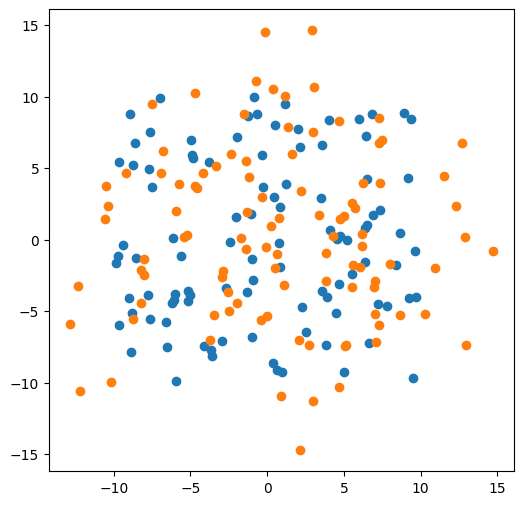

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_proj[:,0], X_proj[:,1])

In [28]:
import pca
from pca import myPCA

mypca = myPCA(n_components=2)

X_mypca = mypca.fit_transform(X=X)

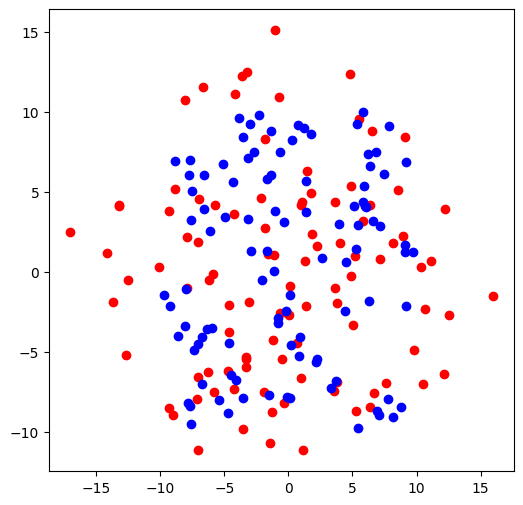

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(X_mypca[:,0], X_mypca[:,1], c='red')
plt.scatter(X[:,0], X[:,1], c='blue')